# Performing Exploratory and data Preparation on the future house data

---------------------------------------Introduction to Data Preparation--------------------------------------------------

Created by John Omole
Email: contact@johnomole.de
Website: www.johnomole.de
Creation Date:
Last Update:

In [ ]:
#------------------------------------Importing Libraries needed.------------------------------------#

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import catboost
from catboost import Pool
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import os

In [2]:
# importing libraries required for our model
import tensorflow as tf
from tensorflow.python import tf2
if not tf2.enabled():
    import tensorflow.compat.v2 as tf
    tf.enable_v2_behavior()
    assert tf2.enabled()

import tensorflow_probability as tfp
tfd = tfp.distributions
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Dropout,Input,LSTM,Dropout
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import regularizers
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import TensorBoard

In [3]:
#-----------------------------------------Importing the data .----------------------------------------------#

In [15]:
#Importing the sales price for training and testing. The datas can be found on csv file in the folder predict_sale
shops = pd.read_csv('Sales data Advanced Forecasting/predict_sale/shops.csv')
items = pd.read_csv('Sales data Advanced Forecasting/predict_sale/items.csv')
item_categories = pd.read_csv('Sales data Advanced Forecasting/predict_sale/item_categories.csv')
train = pd.read_csv('Sales data Advanced Forecasting/predict_sale/sales_train.csv', parse_dates=['date'])
test = pd.read_csv('Sales data Advanced Forecasting/predict_sale/test.csv')
sample = pd.read_csv('Sales data Advanced Forecasting/predict_sale/sample_submission.csv')

In [16]:
#------------------------------------Data Preparation.------------------------------------#

In [17]:
#stastical analysis of the training data
print('Shops Data Descriptive Statistic')
display(train.describe())

print('Test Data Descriptive Statistic')
display(test.describe())

print('Train Data Descriptive Statistic')
display(train.describe())


print('Items Data Descriptive Statistic')
display(items.describe())


print('Item Categories Data Descriptive Statistic')
display(item_categories.describe())


print('Submission Sample Data Descriptive Statistic')
display(sample.describe())

Shops Data Descriptive Statistic


,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


Test Data Descriptive Statistic


,ID,shop_id,item_id
count,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627
std,61834.358168,17.561933,6252.644590
min,0.000000,2.000000,30.000000
25%,53549.750000,16.000000,5381.500000
50%,107099.500000,34.500000,11203.000000
75%,160649.250000,47.000000,16071.500000
max,214199.000000,59.000000,22167.000000


Train Data Descriptive Statistic


,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


Items Data Descriptive Statistic


,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000


Item Categories Data Descriptive Statistic


,item_category_id
count,84.000000
mean,41.500000
std,24.392622
min,0.000000
25%,20.750000
50%,41.500000
75%,62.250000
max,83.000000


Submission Sample Data Descriptive Statistic


,ID,item_cnt_month
count,214200.000000,214200.0
mean,107099.500000,0.5
std,61834.358168,0.0
min,0.000000,0.5
25%,53549.750000,0.5
50%,107099.500000,0.5
75%,160649.250000,0.5
max,214199.000000,0.5


In [18]:
#  Full training data by joining both the train, shops,item_categories using their Id. The Id was later dropped later
train_data = train.join(items, on='item_id', rsuffix='_').join(shops, on='shop_id', rsuffix='_').join(item_categories, on='item_category_id', rsuffix='_').drop(['item_id_', 'shop_id_', 'item_category_id_'], axis=1)
print('Full raw training data')
display(train_data.head())

Full raw training data


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,2013-02-01,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
1,2013-03-01,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
2,2013-05-01,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
3,2013-06-01,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства


In [19]:
#------------------------------------Data Cleaning.------------------------------------#

In [20]:
#  Checking for nan or empty number in the training data
print('Train Data')
display(train_data.isnull().sum())

#Checking for nan or empty number in the testing data
print('Test Data')
display(test.isnull().sum())

Train Data


date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
shop_name             0
item_category_name    0
dtype: int64

Test Data


ID         0
shop_id    0
item_id    0
dtype: int64

In [21]:
print('Train rows: ', train_data.shape[0])
print('Train columns: ', train_data.shape[1])

Train rows:  2935849
Train columns:  10


In [22]:
print('Min date from train set: %s' % train_data['date'].min().date())
print('Max date from train set: %s' % train_data['date'].max().date())

Min date from train set: 2013-01-01
Max date from train set: 2015-12-10


In [23]:
#Checking for item_price and item_cnt_day less or equal to zero.
print('item_price values')
display(train_data[train_data['item_price']<0])

print('item_cnt_day values')
display(train_data[train_data['item_cnt_day']<0])

print('Features shape before cleaning')
display(train_data.shape)

item_price values


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
484683,2013-05-15,4,32,2973,-1.0,1.0,"DmC Devil May Cry [PS3, русские субтитры]",19,"Москва ТЦ ""Серебряный Дом""",Игры - PS3


item_cnt_day values


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
2,2013-05-01,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
148,2013-01-23,0,25,2321,999.00,-1.0,Call of Duty: Black Ops II. Расширенное издани...,28,"Москва ТРК ""Атриум""",Игры PC - Дополнительные издания
175,2013-07-01,0,25,2199,1449.00,-1.0,COLDPLAY Mylo Xyloto LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
807,2013-02-01,0,25,2330,599.00,-1.0,"Call of Duty: Black Ops [PC, Jewel, русская ве...",30,"Москва ТРК ""Атриум""",Игры PC - Стандартные издания
1041,2013-01-13,0,25,5034,1989.00,-1.0,"NHL 13 [Xbox 360, русская документация]",23,"Москва ТРК ""Атриум""",Игры - XBOX 360
1193,2013-02-01,0,25,5651,5490.00,-1.0,PS3: пулемет контроллер (MAG II Gun Controller...,2,"Москва ТРК ""Атриум""",Аксессуары - PS3
1674,2013-07-01,0,25,4093,899.00,-1.0,KISS Monster LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
1825,2013-02-01,0,25,4249,1894.87,-1.0,Kinect Star Wars [только для Kinect] [Xbox 360],23,"Москва ТРК ""Атриум""",Игры - XBOX 360
2411,2013-01-14,0,24,1628,3899.00,-1.0,BEATLES Help! 2DVD Deluxe Edition (фирм.),59,"Москва ТК ""Буденовский"" (пав.К7)",Музыка - Музыкальное видео
3216,2013-08-01,0,24,20948,899.00,-1.0,"Финес и Ферб. Покорение 2-ого измерения [PSP, ...",21,"Москва ТК ""Буденовский"" (пав.К7)",Игры - PSP


Features shape before cleaning


(2935849, 10)

In [24]:
# selecting only records with item_price greater than 0.
train_data = train_data[train_data['item_price']>0]
train_data =train_data[train_data['item_cnt_day']>0]

print('Features shape after cleaning')
display(train_data.shape)

Features shape after cleaning


(2928492, 10)

In [25]:
#Removing outliers

In [26]:
#Dropping Ouliers
def drop_out(df,feature,high_percentile = .99):
    df_shape = df.shape[0]         #train df size before dropping
    max_val = df[feature].quantile(high_percentile)      #Percentile value
    print('Dropping Outliers for ... {}'.format(feature))
    df = df[df[feature] < max_val]
    print(str(df_shape - df.shape[0]) + ' ' + feature + ' values over ' + str(max_val) + ' have been removed' )
    return df

In [27]:
#Dropping outliers for item_price
train_data = drop_out(train_data,'item_price')

Dropping Outliers for ... item_price
29347 item_price values over 5999.0 have been removed


In [28]:
#Dropping outliers for item_cnt_day
train_data = drop_out(train_data,'item_cnt_day')

Dropping Outliers for ... item_cnt_day
37347 item_cnt_day values over 5.0 have been removed


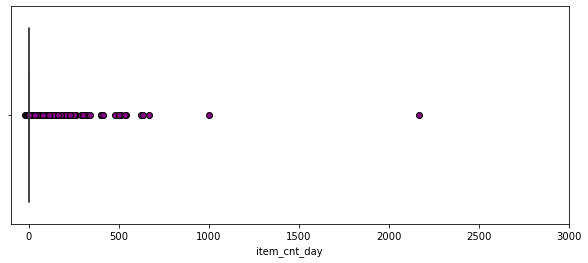

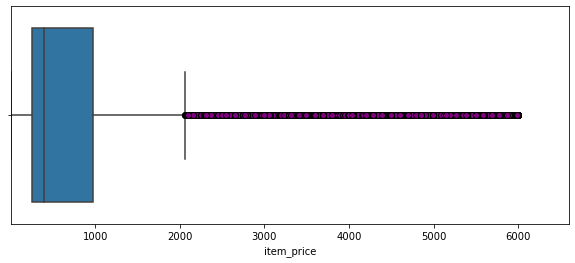

In [29]:
#Visualising outliers
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
flierprops = dict(marker='o', markerfacecolor='purple', markersize=6,
                  linestyle='none', markeredgecolor='black')
sns.boxplot(x=train.item_cnt_day, flierprops=flierprops)

plt.figure(figsize=(10,4))
plt.xlim(train_data.item_price.min(), train_data.item_price.max()*1.1)
sns.boxplot(x=train_data.item_price, flierprops=flierprops)

In [30]:
train_data = train_data[(train_data.item_price < 300000 )& (train_data.item_cnt_day < 1000)]

In [31]:
print('Features')
display(train_data.head())

print('Shape')
display(train_data.shape)

print('Stats')
display(train_data.describe())

Features


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,2013-02-01,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
1,2013-03-01,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
3,2013-06-01,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства
5,2013-10-01,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,"Москва ТРК ""Атриум""",Музыка - Музыкальное видео


Shape


(2861798, 10)

Stats


,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2.861798e+06,2.861798e+06,2.861798e+06,2.861798e+06,2.861798e+06,2.861798e+06
mean,1.454020e+01,3.302684e+01,1.017492e+04,7.500238e+02,1.120092e+00,4.016847e+01
std,9.431261e+00,1.622980e+01,6.321861e+03,8.033721e+02,4.231719e-01,1.686799e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-02,1.000000e+00,0.000000e+00
25%,6.000000e+00,2.200000e+01,4.427000e+03,2.490000e+02,1.000000e+00,2.900000e+01
50%,1.400000e+01,3.100000e+01,9.304000e+03,3.990000e+02,1.000000e+00,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.570200e+04,9.750900e+02,1.000000e+00,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,5.998900e+03,4.000000e+00,8.300000e+01


In [32]:
#-----------------------------------------Feature Engineering.----------------------------------------------#

In [33]:
#  Extracting the unique values for both test and train data
#Several of the shops look like duplicates of each other. This could be down to shops re-opening or possibly moving store location on the same street or shopping centre.
test_shops = test.shop_id.unique()
train_data = train_data[train_data.shop_id.isin(test_shops)]

test_items = test.item_id.unique()

train_data = train_data[train_data.item_id.isin(test_items)]

print('Train')
display(train_data.head())

print('Test')
display(test.head())

Train


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,2013-02-01,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
10,2013-03-01,0,25,2574,399.0,2.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
11,2013-05-01,0,25,2574,399.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
12,2013-07-01,0,25,2574,399.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
13,2013-08-01,0,25,2574,399.0,2.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства


Test


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [34]:
#We are asked to predict total sales for every product and store in the next month, and our data is given by day, so let's remove unwanted columns and aggregate the data by month.

#'item_category_id' maybe very hard to generte for the test set

In [35]:
##selected useful features for training
features = train_data[['date', 'date_block_num', 'shop_id', 'item_id', 'item_cnt_day']]
print('Features Needed')
display(features.head())

Features Needed


,date,date_block_num,shop_id,item_id,item_cnt_day
0,2013-02-01,0,59,22154,1.0
10,2013-03-01,0,25,2574,2.0
11,2013-05-01,0,25,2574,1.0
12,2013-07-01,0,25,2574,1.0
13,2013-08-01,0,25,2574,2.0


In [36]:
#group = train.groupby( ["date_block_num", "shop_id", "item_id"] ).agg( {"item_cnt_day": ["sum"]} )

In [37]:
# Group by month and engineer sum and mean from item price and item_cnt_day.
training = features.sort_values('date').groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False)

training = training.agg({ 'item_cnt_day':['sum']})

# Rename the generated new features.
training.columns = ['date_block_num', 'shop_id', 'item_id', 'item_cnt_month']

print('Grouped')
display(training.head())

Grouped


,date_block_num,shop_id,item_id,item_cnt_month
0,0,2,33,1.0
1,0,2,482,1.0
2,0,2,491,1.0
3,0,2,839,1.0
4,0,2,1007,3.0


In [38]:
# Extracting time based features for two additional features based on month and year
training['year'] = training['date_block_num'].apply(lambda x: ((x//12) + 2013))
training['month'] = training['date_block_num'].apply(lambda x: (x % 12))
print('More Features with month and year columns')
display(training.head())

More Features with month and year columns


,date_block_num,shop_id,item_id,item_cnt_month,year,month
0,0,2,33,1.0,2013,0
1,0,2,482,1.0,2013,0
2,0,2,491,1.0,2013,0
3,0,2,839,1.0,2013,0
4,0,2,1007,3.0,2013,0


In [39]:
#Create test set

In [40]:
test["date_block_num"] = 34
test['year'] = test['date_block_num'].apply(lambda x: ((x//12) + 2013))
test['month'] = test['date_block_num'].apply(lambda x: (x % 12))
test["date_block_num"] = test["date_block_num"].astype(np.int8)
test["shop_id"] = test.shop_id.astype(np.int8)
test["item_id"] = test.item_id.astype(np.int16)
print('Test Features')
display(test.head())

Test Features


,ID,shop_id,item_id,date_block_num,year,month
0,0,5,5037,34,2015,10
1,1,5,5320,34,2015,10
2,2,5,5233,34,2015,10
3,3,5,5232,34,2015,10
4,4,5,5268,34,2015,10


In [41]:
#Concatenate train and test sets.
cols  = ["date_block_num", "shop_id", "item_id"]
full_data= pd.concat([training, test.drop(["ID"],axis = 1)], ignore_index=True, sort=False, keys=cols)
#full_data.fillna( 0, inplace = True )
print('Full_data')
display(full_data.head())

Full_data


,date_block_num,shop_id,item_id,item_cnt_month,year,month
0,0,2,33,1.0,2013,0
1,0,2,482,1.0,2013,0
2,0,2,491,1.0,2013,0
3,0,2,839,1.0,2013,0
4,0,2,1007,3.0,2013,0


In [42]:
def lag_feature( df,lags, cols ):
    for col in cols:
        print(col)
        tmp = df[["date_block_num", "shop_id","item_id",col ]]
        for i in lags:
            shifted = tmp.copy()
            shifted.columns = ["date_block_num", "shop_id", "item_id", col + "_lag_"+str(i)]
            shifted.date_block_num = shifted.date_block_num + i
            df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')
    return df

In [43]:
full_data = lag_feature( full_data, [1,2,3], ["item_cnt_month"] )
#full_data.fillna( 0, inplace = True )
print('Full_data')
display(full_data.head())

item_cnt_month
Full_data


,date_block_num,shop_id,item_id,item_cnt_month,year,month,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3
0,0,2,33,1.0,2013,0,NaN,NaN,NaN
1,0,2,482,1.0,2013,0,NaN,NaN,NaN
2,0,2,491,1.0,2013,0,NaN,NaN,NaN
3,0,2,839,1.0,2013,0,NaN,NaN,NaN
4,0,2,1007,3.0,2013,0,NaN,NaN,NaN


In [44]:
group = full_data.groupby( ["date_block_num"] ).agg({"item_cnt_month" : ["mean"]})
group.columns = ["date_avg_item_cnt"]
group.reset_index(inplace = True)

full_data = pd.merge(full_data, group, on = ["date_block_num"], how = "left")
full_data.date_avg_item_cnt = full_data["date_avg_item_cnt"].astype(np.float16)
full_data = lag_feature( full_data, [1], ["date_avg_item_cnt"] )
full_data.drop( ["date_avg_item_cnt"], axis = 1, inplace = True )

date_avg_item_cnt


In [45]:
days = pd.Series([31,28,31,30,31,30,31,31,30,31,30,31])
full_data["days"] = full_data["month"].map(days).astype(np.int8)

In [46]:
#-----------------------------------------Data Visualization.----------------------------------------------#

In [47]:
#-----------------------------------------Data Selection.----------------------------------------------#

In [48]:
#Delete first three months from matrix. They don't have lag values.
#I'm leaving the first 3 months out because we use a 3 month window to generate features, so these first 3 month won't have really windowed useful features.
full_data = full_data[full_data["date_block_num"] > 3]

features_monthly[features_monthly["date_block_num"]==34].shape

In [49]:
#Our train set will be the first 3~28 blocks, validation will be last 5 blocks (29~32) and test will be block 33.
X_train = full_data[full_data.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train = full_data[full_data.date_block_num < 33]['item_cnt_month']
X_validation = full_data[full_data.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_validation = full_data[full_data.date_block_num == 33]['item_cnt_month']
test_set = full_data[full_data.date_block_num == 34].drop(['item_cnt_month'], axis=1)

In [50]:
print('Training data rows:', X_train.shape[0])
print('Validation data rows:', X_validation .shape[0])
print('Testing data rows:', test_set.shape[0])

Training data rows: 533068
Validation data rows: 28161
Testing data rows: 214200


In [51]:
sets = [X_train, X_validation, test_set]

# Replace missing values with the median of each item.
for dataset in sets:
    for item_id in dataset['item_id'].unique():
        for column in dataset.columns:
            item_median = dataset[(dataset['item_id'] == item_id)][column].median()
            dataset.loc[(dataset[column].isnull()) & (dataset['item_id'] == item_id), column] = item_median

# Replace missing values with the median of each shop.            
for dataset in sets:
    for shop_id in dataset['shop_id'].unique():
        for column in dataset.columns:
            shop_median = dataset[(dataset['shop_id'] == shop_id)][column].median()
            dataset.loc[(dataset[column].isnull()) & (dataset['shop_id'] == shop_id), column] = shop_median
            
# Fill remaining missing values on test set with mean.
test_set.fillna(test_set.mean(), inplace=True)

In [52]:
print('Final Training data')
display(X_train.head())

Final Training data


,date_block_num,shop_id,item_id,year,month,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,date_avg_item_cnt_lag_1,days
34321,4.0,2.0,482.0,2013.0,4.0,1.0,1.0,1.0,2.298828,31.0
34322,4.0,2.0,491.0,2013.0,4.0,1.0,1.0,1.0,2.337891,31.0
34323,4.0,2.0,687.0,2013.0,4.0,1.0,1.0,1.0,2.375000,31.0
34324,4.0,2.0,790.0,2013.0,4.0,2.0,2.0,2.0,2.298828,31.0
34325,4.0,2.0,835.0,2013.0,4.0,1.0,1.0,2.0,2.298828,31.0


In [53]:
print('Final Validating data')
display(X_validation.head())

Final Validating data


,date_block_num,shop_id,item_id,year,month,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,date_avg_item_cnt_lag_1,days
567389,33.0,2.0,31.0,2015.0,9.0,1.0,1.0,1.0,1.933594,31.0
567390,33.0,2.0,486.0,2015.0,9.0,1.0,2.0,3.0,1.933594,31.0
567391,33.0,2.0,787.0,2015.0,9.0,2.0,2.0,3.0,1.933594,31.0
567392,33.0,2.0,794.0,2015.0,9.0,2.5,2.0,3.0,1.933594,31.0
567393,33.0,2.0,968.0,2015.0,9.0,1.0,1.0,1.0,1.933594,31.0


In [54]:
print('Final Test data')
display(test_set.head())

Final Test data


,date_block_num,shop_id,item_id,year,month,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,date_avg_item_cnt_lag_1,days
595550,34.0,5.0,5037.0,2015.0,10.0,1.0,1.0,3.0,1.894531,30.0
595551,34.0,5.0,5320.0,2015.0,10.0,1.0,1.0,1.0,1.894531,30.0
595552,34.0,5.0,5233.0,2015.0,10.0,1.0,3.0,1.0,1.894531,30.0
595553,34.0,5.0,5232.0,2015.0,10.0,1.0,1.5,1.0,1.894531,30.0
595554,34.0,5.0,5268.0,2015.0,10.0,1.0,1.0,1.0,1.894531,30.0


In [55]:
print('Final Training Label')
display(Y_train.head())

Final Training Label


34321    1.0
34322    1.0
34323    1.0
34324    1.0
34325    2.0
Name: item_cnt_month, dtype: float64

In [56]:
print('Final Validating Label')
display(Y_validation.head())

Final Validating Label


567389    1.0
567390    3.0
567391    1.0
567392    1.0
567393    1.0
Name: item_cnt_month, dtype: float64

In [ ]:
#Saving the data into CSV
X_train.to_csv('Sales data Advanced Forecasting/predict_sale/X_train.csv')
X_validation.to_csv('Sales data Advanced Forecasting/predict_sale/X_validation.csv')
Y_train.to_csv('Sales data Advanced Forecasting/predict_sale/Y_train.csv')
Y_validation.to_csv('Sales data Advanced Forecasting/predict_sale/Y_validation.csv')
test_set.to_csv('Sales data Advanced Forecasting/predict_sale/test_set.csv')

In [ ]:
#-----------------------------------------Scaling.----------------------------------------------#

In [ ]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()

X_scale_train = X_scaler.fit_transform(X_train).astype('int32')
Y_scale_train = Y_scaler.fit_transform(np.array(Y_train).reshape(-1,1)).astype('int32')
X_scale_validation = X_scaler.transform(X_validation).astype('int32')
Y_scale_validation = Y_scaler.transform(np.array(Y_validation).reshape(-1,1)).astype('int32')
X_scale_test = X_scaler.transform(test_set).astype('int32')

In [11]:
#Saving the data into CSV
X_train= pd.read_csv('Sales data Advanced Forecasting/predict_sale/X_train.csv', index_col=0).values
X_validation = pd.read_csv('Sales data Advanced Forecasting/predict_sale/X_validation.csv', index_col=0).values
Y_train = pd.read_csv('Sales data Advanced Forecasting/predict_sale/Y_train.csv', index_col=0).values
Y_validation = pd.read_csv('Sales data Advanced Forecasting/predict_sale/Y_validation.csv', index_col=0).values
test_set = pd.read_csv('Sales data Advanced Forecasting/predict_sale/test_set.csv', index_col=0).values

In [ ]:
#-----------------------------------------Modelling.----------------------------------------------#

In [57]:
model = XGBRegressor(
    max_depth=10,
    n_estimators=1000,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
#     tree_method='gpu_hist',
    seed=42)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_validation, Y_validation)], 
    verbose=True, 
    early_stopping_rounds = 20)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:07:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3.54719	validation_1-rmse:2.85648
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:3.3314	validation_1-rmse:2.70519
[2]	validation_0-rmse:3.148	validation_1-rmse:2.58568
[3]	validation_0-rmse:2.98276	validation_1-rmse:2.47779
[4]	validation_0-rmse:2.83754	validation_1-rmse:2.39756
[5]	validation_0-rmse:2.71395	validation_1-rmse:2.31492
[6]	validation_0-rmse:2.60621	validation_1-rmse:2.25357
[7]	validation_0-rmse:2.51479	validation_1-rmse:2.20708
[8]	validation_0-rmse:2.43412	validation_1-rmse:2.16395
[9]	validation_0-rmse:2.36249	validation_1-rmse:2.12588
[10]	validation_0-rmse:2.30314	validation_1-rmse:2.09938
[11]	validation_0-rmse:2.25047	validation_1-rmse:2.07335
[12]	v

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=0.5, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=None,
       subsample=0.8, verbosity=1)

In [58]:
Y_pred = model.predict(X_validation)
Y_test = model.predict(test_set)

#Y_test = Y_scaler.inverse_transform(Y_test.reshape(-1,1))

In [59]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [60]:
r2= r2_score(Y_validation, Y_pred)
mae= mean_absolute_error(Y_validation, Y_pred)
mse= mean_squared_error(Y_validation, Y_pred)
print(r2,mae,mse)

0.46612419299973284 0.938466622161364 3.866845800457599


In [ ]:
submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": Y_test
})
submission.to_csv('xgb_submission.csv', index=False)

In [ ]:
Y_test

In [ ]:
#-----------------------------------------Prediction.----------------------------------------------#

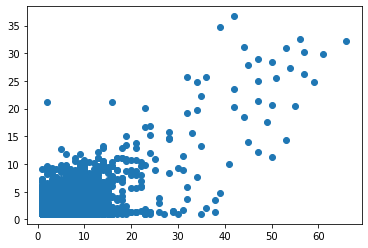

In [85]:
plt.scatter(Y_validation, preds)

In [86]:
r2= r2_score(Y_validation, preds)

In [88]:
r2

0.40165209855158857